In [1]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [3]:
data=pl.read_csv("churn.csv").drop("RowNumber","CustomerId","Surname")
data

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,str,str,i64,i64,f64,i64,i64,i64,f64,i64
619,"""France""","""Female""",42,2,0.0,1,1,1,101348.88,1
608,"""Spain""","""Female""",41,1,83807.86,1,0,1,112542.58,0
502,"""France""","""Female""",42,8,159660.8,3,1,0,113931.57,1
699,"""France""","""Female""",39,1,0.0,2,0,0,93826.63,0
850,"""Spain""","""Female""",43,2,125510.82,1,1,1,79084.1,0
…,…,…,…,…,…,…,…,…,…,…
771,"""France""","""Male""",39,5,0.0,2,1,0,96270.64,0
516,"""France""","""Male""",35,10,57369.61,1,1,1,101699.77,0
709,"""France""","""Female""",36,7,0.0,1,0,1,42085.58,1


In [4]:
data.describe()

statistic,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",10000.0,"""10000""","""10000""",10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",650.5288,null,null,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037
"""std""",96.653299,null,null,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
"""min""",350.0,"""France""","""Female""",18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
"""25%""",584.0,null,null,32.0,3.0,0.0,1.0,0.0,0.0,51011.29,0.0
"""50%""",652.0,null,null,37.0,5.0,97208.46,1.0,1.0,1.0,100200.4,0.0
"""75%""",718.0,null,null,44.0,7.0,127642.44,2.0,1.0,1.0,149384.43,0.0
"""max""",850.0,"""Spain""","""Male""",92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0


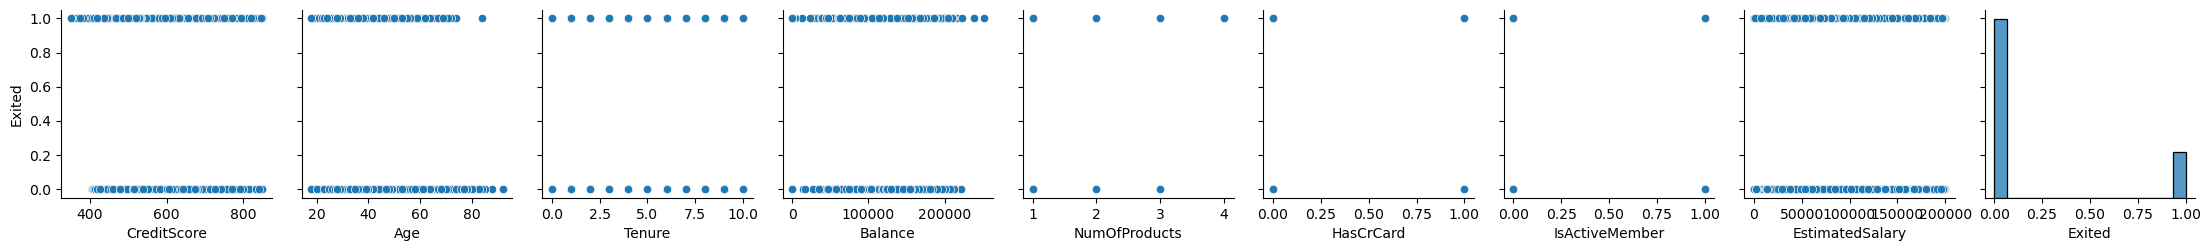

In [5]:
sns.pairplot(data.to_pandas(),y_vars=["Exited"])
plt.show()

# Imbalanced dataSet

In [6]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.drop("Exited").columns if data[col].dtype!= pl.String]

# Categorical EDA

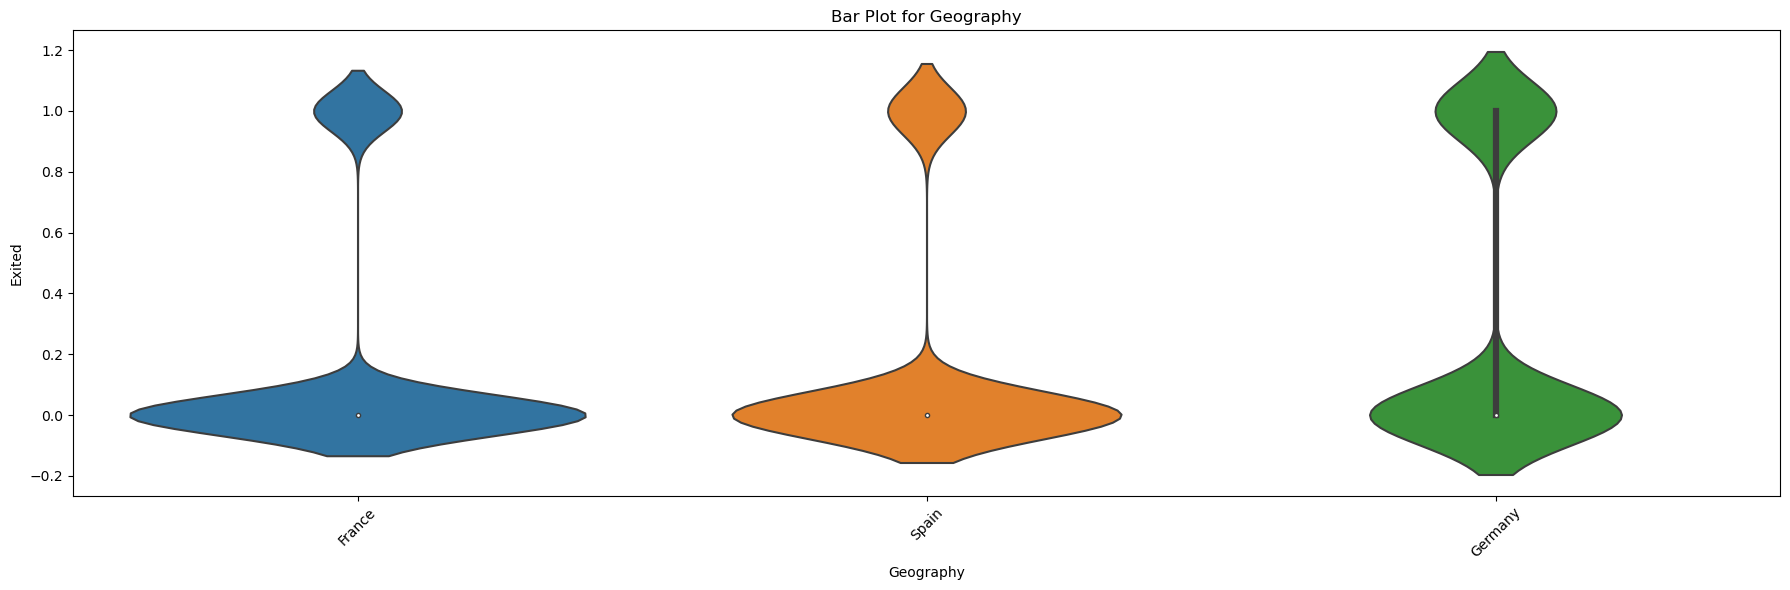

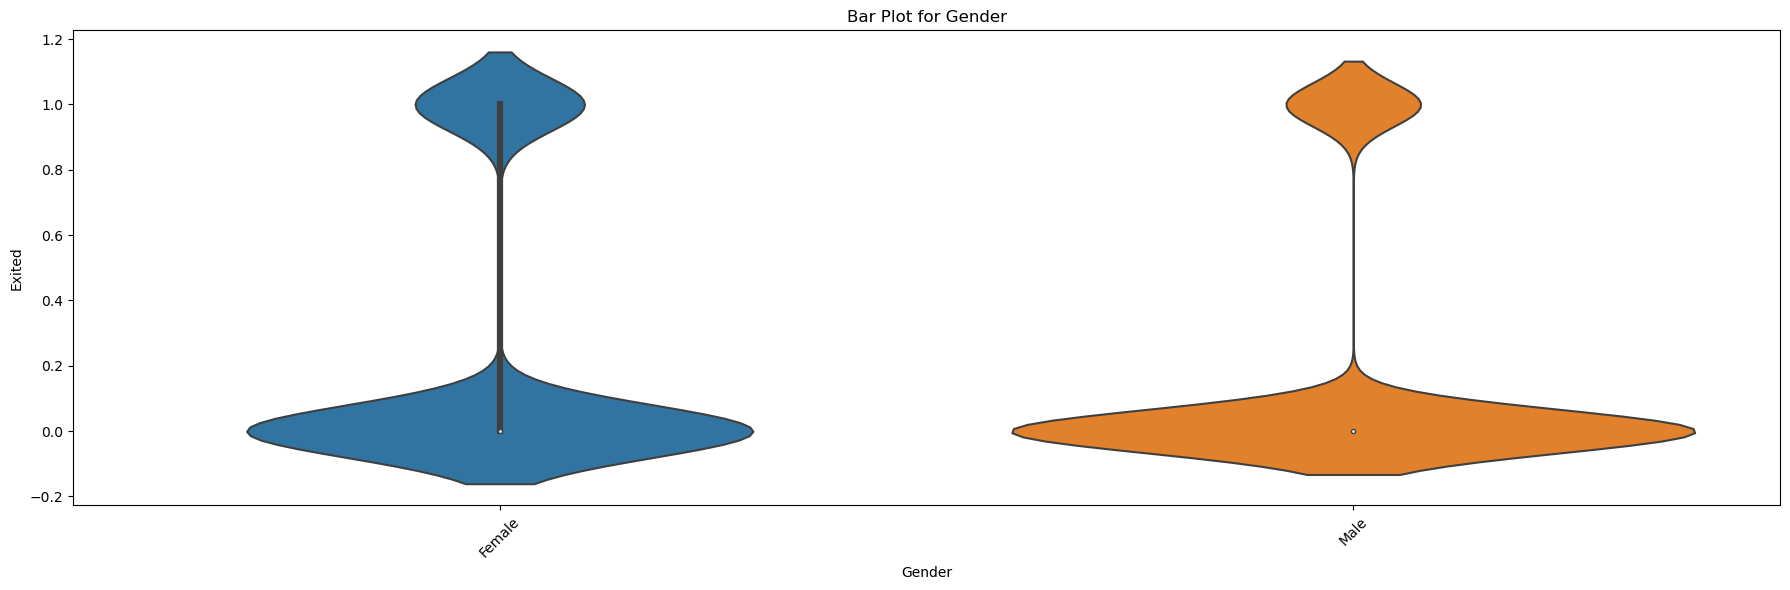

In [7]:
categorical_violin_plot(data.to_pandas(),cat_cols,"Exited")

In [8]:
perform_non_normal_kruskal_hypothesis(data,cat_cols,"Exited")

Kruskal-Wallis H-statistic: 301.22521129066496
P-value: 3.888449500851512e-66
There is a significant difference in Exited between different Geography categories.
Kruskal-Wallis H-statistic: 113.43775539389111
P-value: 1.7302867496277846e-26
There is a significant difference in Exited between different Gender categories.


In [9]:
for i in cat_cols:
    print(data[i].value_counts())

shape: (3, 2)
┌───────────┬───────┐
│ Geography ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Germany   ┆ 2509  │
│ France    ┆ 5014  │
│ Spain     ┆ 2477  │
└───────────┴───────┘
shape: (2, 2)
┌────────┬───────┐
│ Gender ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ Female ┆ 4543  │
│ Male   ┆ 5457  │
└────────┴───────┘


# Numerical EDA

## Univariate Analysis

In [175]:
# categorical_hist_plot(data.to_pandas(),num_cols,"Exited")

In [11]:
# # train_data=train_data.with_columns(train_data["Age"].map_elements(lambda X :X == X > 50).alias("age50+").cast(pl.Int64))
# train_data=train_data.with_columns(train_data["Payment Delay"].map_elements(lambda X :X == X > 15).alias("paymentDelay20+").cast(pl.Int64))
# # train_data=train_data.with_columns(train_data["Total Spend"].map_elements(lambda X :X == X > 500).alias("TotalSpend500+").cast(pl.Int64))
# train_data=train_data.with_columns(train_data["Support Calls"].map_elements(lambda X :X == X > 5).alias("supportcalls5+").cast(pl.Int64))

# # test_data=test_data.with_columns(test_data["Age"].map_elements(lambda X :X == X > 50).alias("age50+").cast(pl.Int64))
# test_data=test_data.with_columns(test_data["Payment Delay"].map_elements(lambda X :X == X > 15).alias("paymentDelay20+").cast(pl.Int64))
# # test_data=test_data.with_columns(test_data["Total Spend"].map_elements(lambda X :X == X > 500).alias("TotalSpend500+").cast(pl.Int64))
# test_data=test_data.with_columns(test_data["Support Calls"].map_elements(lambda X :X == X > 5).alias("supportcalls5+").cast(pl.Int64))
# # num_cols.append("age50+")
# num_cols.append("paymentDelay20+")
# # num_cols.append("TotalSpend500+")

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
X=data.drop("Exited").to_pandas()
y=data["Exited"].to_pandas()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)
enc = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)

pipe = Pipeline(
    [
        ("enc", enc),
        ("classifier", LogisticRegression(max_iter=10000,class_weight={0: 1, 1: 3})),
    ]
)
pipe

Pipeline(steps=[('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 3},
                                    max_iter=10000))])

In [168]:
pipe.fit(X_train,y_train)
predictions=pipe.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score
print("logistic reg",accuracy_score(y_true=y_test,y_pred=predictions))
print(classification_report(y_test,predictions))

logistic reg 0.7616
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1991
           1       0.44      0.61      0.51       509

    accuracy                           0.76      2500
   macro avg       0.66      0.70      0.68      2500
weighted avg       0.80      0.76      0.77      2500



In [170]:
roc_auc_score(y_test,predictions)

0.7040888319638767

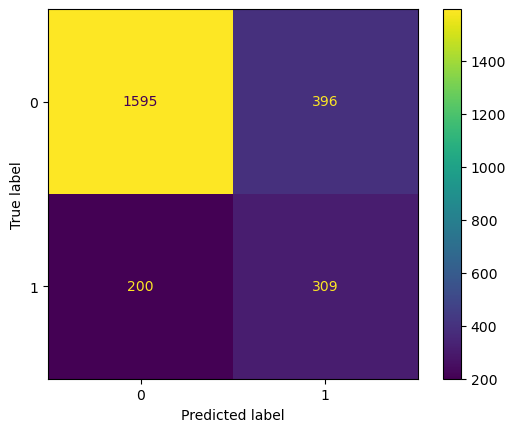

In [171]:
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions),display_labels=pipe.named_steps["classifier"].classes_)
disp.plot()

In [172]:
fpr, tpr, thresholds=roc_curve(y_test,predictions)

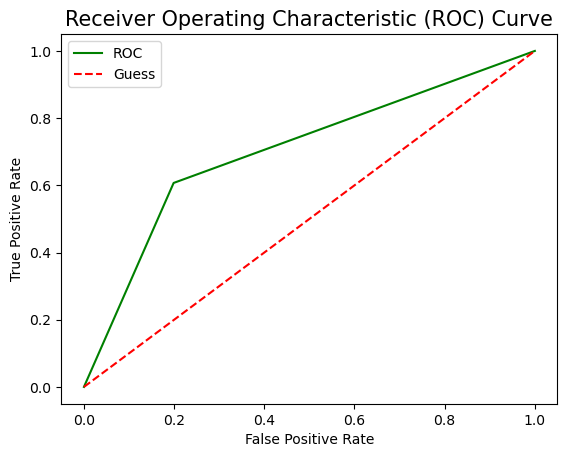

In [173]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Guess')
    
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)